In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### 用户基本信息表

In [2]:
# 训练集
user_info_cloumns = ['user_id', 'sex', 'occupation', 'education', 'marriage', 'household_type']
user_info = pd.read_table("../data/train/user_info_train.txt", names=user_info_cloumns, sep=',')

# 测试集
user_info_test = pd.read_table("../data/test/user_info_test.txt", names=user_info_cloumns, sep=',')

In [3]:
user_info.to_csv('test.csv')

### 银行流水记录表

In [4]:
# 训练集
bank_detail = pd.read_table("../data/train/bank_detail_train.txt", sep=',')
bank_detail.rename(columns={'uid':'user_id', 'timespan':'time', 'type':'deal_type', 
                            'amount':'deal_amount', 'markup':'wage_type'}, inplace=True)

# 测试集
bank_detail_columns = ['user_id', 'time', 'deal_type', 'deal_amount', 'wage_type']
bank_detail_test = pd.read_table("../data/test/bank_detail_test.txt", names=bank_detail_columns, sep=',')

### 用户浏览记录表

In [5]:
# 训练集
browse_history_columns = ['user_id', 'time', 'browse_behavior', 'browse_subbehavior']
browse_history = pd.read_table("../data/train/browse_history_train.txt", names=browse_history_columns, sep=',')

# 测试集
browse_history_test = pd.read_table("../data/test/browse_history_test.txt", names=browse_history_columns, sep=',')

### 信用卡账单记录表

In [6]:
# 训练集
bill_detail_columns = ['user_id', 'time', 'bank_id', 'previous_bills', 'previous_repayment', 'creditCardQuota', 
                       'current_balance', 'current_MinRepay', 'consume_times', 'current_bills', 'adjust_money',
                       'revolving_interest', 'available_money', 'cash_Advance_Limit', 'repayment_status']
bill_detail = pd.read_table("../data/train/bill_detail_train.txt", names=bill_detail_columns, sep=',')

# 测试集
bill_detail_test = pd.read_table("../data/test/bill_detail_test.txt", names=bill_detail_columns, sep=',')

In [7]:
bill_detail.to_csv('bill.csv')

### 放款时间信息表

In [8]:
# 训练集
loan_time_columns = ['user_id', 'time']
loan_time = pd.read_table("../data/train/loan_time_train.txt", names=loan_time_columns, sep=',')

# 测试集
loan_time_test = pd.read_table("../data/test/loan_time_test.txt", names=loan_time_columns, sep=',')

### 用户逾期记录表 

In [9]:
# 训练集
overdue_columns = ['user_id', 'isOverdue']
overdue = pd.read_table("../data/train/overdue_train.txt", names=overdue_columns, sep=',')

# 测试集（预测标签）
overdue_pred = pd.read_table("../data/test/usersID_test.txt", names=['user_id'], sep=',')

# EDA

### 时间数据脱敏还原

In [99]:
# import time

# table_names = [bank_detail, browse_history, bill_detail, loan_time]

# for value in table_names:
#     value['year'] = value['time'].apply(lambda x: int(time.strftime("%Y", time.localtime(x))))
#     value['month'] = value['time'].apply(lambda x: int(time.strftime("%m", time.localtime(x))))
#     value['day'] = value['time'].apply(lambda x: int(time.strftime("%d", time.localtime(x))))
#     value.drop('time', axis=1, inplace=True)

In [131]:
# 时间戳单位为秒，量级太大，转化为天

table_names = [bank_detail, browse_history, bill_detail, loan_time]
for value in table_names:
    value['time'] = value['time'] // 86400

### 合并user_info、bill_detail、loan_time、overdue四张表

In [ ]:
#　训练集
bill_detail = pd.merge(bill_detail, loan_time, how='inner', on='user_id')
overdue = pd.merge(overdue, user_info, how='inner', on='user_id')
overdue = pd.merge(overdue, loan_time, how='inner', on='user_id')

# 测试集
bill_detail_test = pd.merge(bill_detail_test, loan_time_test, how='inner', on='user_id')
overdue_pred = pd.merge(overdue_pred, user_info_test, how='inner', on='user_id')
overdue_pred = pd.merge(overdue_pred, loan_time_test, how='inner', on='user_id')

### user_info表中的离散属性对应的逾期情况

In [ ]:
sex_analysis = overdue.groupby('sex', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
sex_analysis['overdue_rate'] = sex_analysis['sum'] / sex_analysis['count']
sex_analysis

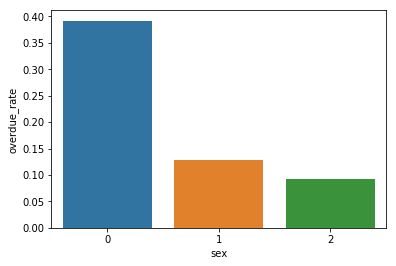

In [44]:
sns.barplot(sex_analysis['sex'], sex_analysis['overdue_rate'])
plt.show()

In [46]:
occupation_analysis = overdue.groupby('occupation', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
occupation_analysis['overdue_rate'] = occupation_analysis['sum'] / occupation_analysis['count']
occupation_analysis

,occupation,sum,count,overdue_rate
0,0,75,368,0.203804
1,1,17,93,0.182796
2,2,5204,41150,0.126464
3,3,746,5898,0.126484
4,4,1141,8087,0.141091


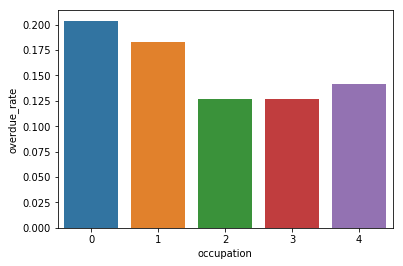

In [51]:
sns.barplot(occupation_analysis['occupation'], occupation_analysis['overdue_rate'])
plt.show()

In [48]:
education_analysis = overdue.groupby('education', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
education_analysis['overdue_rate'] = education_analysis['sum'] / education_analysis['count']
education_analysis

,education,sum,count,overdue_rate
0,0,75,369,0.203252
1,1,18,226,0.079646
2,2,813,8483,0.095839
3,3,2977,23530,0.126519
4,4,3300,22988,0.143553


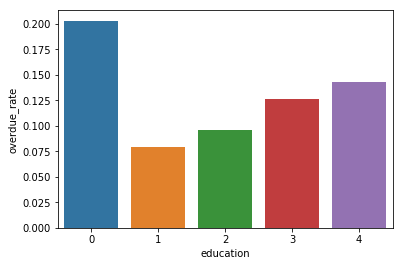

In [52]:
sns.barplot(education_analysis['education'], education_analysis['overdue_rate'])
plt.show()

In [49]:
marriage_analysis = overdue.groupby('marriage', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
marriage_analysis['overdue_rate'] = marriage_analysis['sum'] / marriage_analysis['count']
marriage_analysis

,marriage,sum,count,overdue_rate
0,0,75,370,0.202703
1,1,3169,25098,0.126265
2,2,805,6038,0.133322
3,3,2909,22554,0.128979
4,4,210,1471,0.142760
5,5,15,65,0.230769


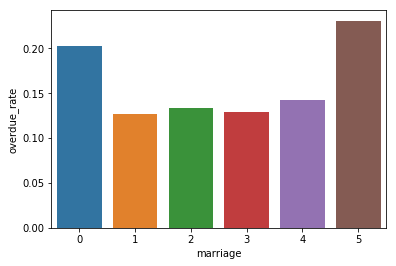

In [53]:
sns.barplot(marriage_analysis['marriage'], marriage_analysis['overdue_rate'])
plt.show()

In [50]:
household_type_analysis = overdue.groupby('household_type', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
household_type_analysis['overdue_rate'] = household_type_analysis['sum'] / household_type_analysis['count']
household_type_analysis

,household_type,sum,count,overdue_rate
0,0,75,369,0.203252
1,1,2033,17105,0.118854
2,2,2145,15557,0.137880
3,3,978,8216,0.119036
4,4,1952,14349,0.136037


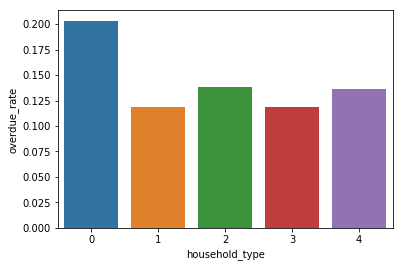

In [54]:
sns.barplot(household_type_analysis['household_type'], household_type_analysis['overdue_rate'])
plt.show()

## 训练数据构建

In [10]:
train_data = pd.merge(user_info, overdue, how='inner', on='user_id')

当前结论：  
- 时间戳非线性脱敏，应该只保留了先后关系，无法提取周期性特征  
- 对于55596个用户，在部分表中存在大量缺失值  

### 时间已知 / 放款前 用户浏览行为

In [11]:
browseAndLoan = pd.merge(browse_history, loan_time, how='left', on='user_id')

In [12]:
# 浏览记录时间 <= 放款时间，时间非0（0代表未知）
temp = browseAndLoan[(browseAndLoan['time_x'] <= browseAndLoan['time_y']) & (browseAndLoan['time_x'] > 0)]

In [13]:
# 行为是连续数值表示的类别特征
# 子行为应该是用户行为更细粒度的划分，所以将两者转化为字符串拼接，作为新特征
temp['cross_behavior'] = temp['browse_behavior'].astype(str).values + '_' + temp['browse_subbehavior'].astype(str).values

In [14]:
# 对cross_behavior进行自然数编码

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(temp['cross_behavior'])
temp['cross_behavior'] = encoder.transform(temp['cross_behavior'])

In [15]:
# 每个用户进行了多少次行为统计
to_merge = temp.groupby('user_id', as_index=False)['browse_behavior'].agg({'behavior_count': 'count'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [16]:
#　获取numpy数组的众数

from scipy import stats

def get_mode(arr):
    return stats.mode(arr)[0][0]

In [17]:
# 每个用户的不同行为数和频率最高的行为
to_merge = temp.groupby('user_id', as_index=False)['browse_behavior'].agg({'unique_behavior': 'nunique', 
                                                                           'browse_behavior_mode': get_mode})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [18]:
# 每个用户的不同子行为数和频率最高的子行为
to_merge = temp.groupby('user_id', as_index=False)['browse_subbehavior'].agg({'unique_subbehavior': 'nunique', 
                                                                              'browse_subbehavior_mode': get_mode})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [19]:
# 每个用户的不同交叉行为数和频率最高的交叉行为
to_merge = temp.groupby('user_id', as_index=False)['cross_behavior'].agg({'cross_behavior': 'nunique', 
                                                                          'cross_behavior_mode': get_mode})
train_data = train_data.merge(to_merge, how='left', on='user_id')

统计用户频率最高 / 最低的行为 / 子行为，由于特征构建速度过慢，后期再考虑

### 时间已知 / 放款前 银行流水记录

In [20]:
bankAndLoan = pd.merge(bank_detail, loan_time, how='left', on='user_id')

In [21]:
temp = bankAndLoan.loc[(bankAndLoan['time_x'] <= bankAndLoan['time_y']) & (bankAndLoan['time_x'] > 0)]

- 收入 = 工资性收入 + 非工资性收入  
- 支出统计  
- 支出与收入的比较  
- 支出和收入的其他统计特征，如均值、方差、极差之类

#### 每个用户的收入情况

In [22]:
# 变异系数
def get_cv(arr):
    return arr.mean() / arr.std()

deal_type_0 = temp[temp['deal_type'] == 0].groupby(['user_id'], as_index=False)
income_analysis = deal_type_0['deal_amount'].agg({'income_count': 'count', 'income_sum': 'sum', 
                                                  'income_median': 'median', 'income_std': 'std',
                                                  'income_cv': get_cv})

In [23]:
train_data = train_data.merge(income_analysis, how='left', on='user_id')

#### 每个用户的支出情况

In [24]:
deal_type_1 = temp[temp['deal_type'] == 1].groupby(['user_id'], as_index=False)
expen_analysis = deal_type_1['deal_amount'].agg({'expen_count': 'count', 'expen_sum': 'sum', 
                                                 'expen_median': 'median', 'expen_std': 'std',
                                                 'expen_cv': get_cv})

In [25]:
train_data = train_data.merge(expen_analysis, how='left', on='user_id')

#### 工资性收入

In [26]:
# 若存在某条记录既是工资收入，又是支出，逻辑矛盾，归为异常数据
temp[(temp['wage_type'] == 1) & (temp['deal_type'] == 1)]

,user_id,time_x,deal_type,deal_amount,wage_type,time_y


In [27]:
wage_type_1 = temp[temp['wage_type'] == 1].groupby(['user_id'], as_index=False)
wage_income = wage_type_1['deal_amount'].agg({'wages_count': 'count', 'wages_sum': 'sum'})

- 绝大部分用户缺失，是没有统计到，还是没有工资性收入？  
- 是否有工资性收入应该是个强特

In [28]:
train_data = train_data.merge(wage_income, how='left', on='user_id')

#### 非工资性收入

In [29]:
wage_type_0 = temp[(temp['wage_type'] == 0) & (temp['deal_type'] == 0)].groupby(['user_id'], as_index=False)
non_wage_income = wage_type_0['deal_amount'].agg({'non_wages_sum': 'sum', 'non_wages_median': 'median', 
                                                  'non_wages_std': 'std', 'non_wages_cv': get_cv})

In [30]:
train_data = train_data.merge(non_wage_income, how='left', on='user_id')

#### 平均每笔收入

In [31]:
train_data['per_income'] = train_data['income_sum'] / train_data['income_count']

#### 平均每笔支出

In [32]:
train_data['per_expen'] = train_data['expen_sum'] / train_data['expen_count']

### 时间已知 / 放款前 信用卡账单

In [33]:
billAndLoan = bill_detail.merge(loan_time, how='left', on='user_id')

In [34]:
temp = billAndLoan.loc[(billAndLoan['time_x'] <= billAndLoan['time_y']) & (billAndLoan['time_x'] > 0)]

In [35]:
temp['repayment_status'].value_counts()

0    1533504
1        199
Name: repayment_status, dtype: int64

极少数人是非欠款状态

In [36]:
ccards_num = temp.groupby(['user_id'], as_index=False)['bank_id'].agg({'bank_num': 'nunique'})
train_data = train_data.merge(ccards_num, how='left', on='user_id')

In [37]:
to_merge = temp.groupby(['user_id'], as_index=False)['previous_bills'].agg({'previous_bills_count': 'count', 
                                                                            'previous_bills_sum': 'sum', 
                                                                            'previous_bills_median': 'median', 
                                                                            'previous_bills_std': 'std', 
                                                                            'previous_bills_max': 'max', 
                                                                            'previous_bills_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [38]:
to_merge = temp.groupby(['user_id'], as_index=False)['previous_repayment'].agg({'previous_repayment_sum': 'sum', 
                                                                                'previous_repayment_median': 'median', 
                                                                                'previous_repayment_std': 'std', 
                                                                                'previous_repayment_max': 'max', 
                                                                                'previous_repayment_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [39]:
to_merge = temp.groupby(['user_id'], as_index=False)['creditCardQuota'].agg({'creditCardQuota_mean': 'mean', 
                                                                             'creditCardQuota_max': 'max', 
                                                                             'creditCardQuota_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [40]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_balance'].agg({'current_balance_mean': 'mean', 
                                                                             'current_balance_sum': 'sum'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [41]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_MinRepay'].agg({'current_MinRepay_mean': 'mean', 
                                                                              'current_MinRepay_sum': 'sum'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [42]:
# 极差
def get_ptp(arr):
    return arr.max() - arr.min()

to_merge = temp.groupby(['user_id'], as_index=False)['consume_times'].agg({'consume_times_median': 'median', 
                                                                           'consume_times_sum': 'sum', 
                                                                           'consume_times_ptp': get_ptp})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [43]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_bills'].agg({'current_bills_sum': 'sum', 
                                                                           'current_bills_median': 'median', 
                                                                           'current_bills_std': 'std', 
                                                                           'current_bills_max': 'max', 
                                                                           'current_bills_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [44]:
to_merge = temp.groupby(['user_id'], as_index=False)['adjust_money'].agg({'adjust_money_mean': 'mean', 
                                                                          'adjust_money_sum': 'sum', 
                                                                          'adjust_money_max': 'max',
                                                                          'adjust_money_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [45]:
to_merge = temp.groupby(['user_id'], as_index=False)['revolving_interest'].agg({'revolving_interest_mean': 'mean', 
                                                                                'revolving_interest_sum': 'sum', 
                                                                                'revolving_interest_max': 'max',
                                                                                'revolving_interest_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [46]:
to_merge = temp.groupby(['user_id'], as_index=False)['available_money'].agg({'available_money_sum': 'sum', 
                                                                             'available_money_median': 'median', 
                                                                             'available_money_std': 'std', 
                                                                             'available_money_max': 'max', 
                                                                             'available_money_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [47]:
to_merge = temp.groupby(['user_id'], as_index=False)['cash_Advance_Limit'].agg({'cash_Advance_Limit_mean': 'mean', 
                                                                                'cash_Advance_Limit_max': 'max'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [48]:
# 还款次数 / 统计次数
repay_proba = temp.groupby(['user_id'], as_index=False)['repayment_status'].agg({'isRepay': 'mean'})
# 是否有过还款状态为 1 （已还款；可能存在分期还款）
repay_proba['isRepay'] = repay_proba['isRepay'].apply(lambda x: 1 if x > 0 else 0)
train_data = train_data.merge(repay_proba, how='left', on='user_id')

In [49]:
# 上期还款差额 = 上期账单金额 - 上期还款金额
temp['pre_payBalance'] = temp['previous_bills'] - temp['previous_repayment']
to_merge = temp.groupby(['user_id'], as_index=False)['pre_payBalance'].agg({'pre_payBalance_meam': 'mean', 
                                                                            'pre_payBalance_max': 'max'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

### 时间已知 / 放款后 信用卡账单

In [50]:
billAndLoan.loc[(billAndLoan['time_x'] > billAndLoan['time_y']) & (billAndLoan['time_y'] > 0)]['user_id'].nunique()

34998

后期再考虑

### 缺失值分析

In [51]:
# 各属性的缺失值数量
miss = train_data.drop('isOverdue', axis=1).isnull().sum()
miss[miss > 0].sort_values(ascending=False)

wages_count                52678
wages_sum                  52678
non_wages_cv               46352
non_wages_std              46352
expen_std                  46343
expen_cv                   46343
income_std                 46340
income_cv                  46340
expen_median               46338
per_expen                  46338
expen_count                46338
expen_sum                  46338
non_wages_sum              46333
non_wages_median           46333
income_median              46329
income_sum                 46329
income_count               46329
per_income                 46329
current_bills_std          15401
previous_bills_std         15401
previous_repayment_std     15401
available_money_std        15401
previous_repayment_min     12536
bank_num                   12536
previous_bills_count       12536
previous_bills_sum         12536
previous_bills_median      12536
previous_bills_max         12536
previous_bills_min         12536
previous_repayment_sum     12536
          

**部分缺失值太大的特征考虑drop，不然会作为噪声影响模型**

In [52]:
drop_features = ['wages_count', 'wages_sum', 'non_wages_cv', 'non_wages_std', 'expen_cv', 'income_cv']
train_data.drop(drop_features, axis=1, inplace=True)

In [53]:
fill_median = ['expen_count', 'income_count', 'previous_bills_count']

# 标志缺失
for feat in fill_median:
    train_data[feat + '_nan'] = train_data[feat].isnull().apply(lambda x: 1 if x == True else 0)

# 连续整型用中位数填充
for feat in fill_median:
    train_data[feat] = train_data[feat].fillna(train_data[feat].median())  

In [54]:
fill_mode = ['bank_num', 'cross_behavior', 'unique_subbehavior', 'unique_behavior', 'behavior_count', 
             'browse_behavior_mode', 'browse_subbehavior_mode', 'cross_behavior_mode']

# 标志缺失
for feat in fill_mode:
    train_data[feat + '_nan'] = train_data[feat].isnull().apply(lambda x: 1 if x == True else 0)

# 离散整型用众数填充
for feat in fill_mode:
    train_data[feat] = train_data[feat].fillna(train_data[feat].mode()[0])

In [55]:
# 还款状态，缺失值用-1填充，作为一个新类别
train_data['isRepay'] = train_data['isRepay'].fillna(-1)

In [56]:
miss = train_data.drop('isOverdue', axis=1).isnull().sum()
numeric_feats = miss[miss > 0].keys().values

# 标志缺失
for feat in numeric_feats:
    train_data[feat + '_nan'] = train_data[feat].isnull().apply(lambda x: 1 if x == True else 0)

# 连续数值型使用均值填充
for feat in numeric_feats:
    train_data[feat] = train_data[feat].fillna(train_data[feat].mean())

### 截断

大部分float型数据小数点后有6位，可能是数据脱敏导致的，也可能是误差

In [106]:
# 当前数据中的 int型特征
int_cols = [col for col in train_data.columns if train_data[col].dtypes == 'int64']
int_cols

['user_id',
 'sex',
 'occupation',
 'education',
 'marriage',
 'household_type',
 'isOverdue',
 'expen_count_nan',
 'income_count_nan',
 'previous_bills_count_nan',
 'bank_num_nan',
 'cross_behavior_nan',
 'unique_subbehavior_nan',
 'unique_behavior_nan',
 'behavior_count_nan',
 'browse_behavior_mode_nan',
 'browse_subbehavior_mode_nan',
 'cross_behavior_mode_nan',
 'income_sum_nan',
 'income_median_nan',
 'income_std_nan',
 'expen_sum_nan',
 'expen_median_nan',
 'expen_std_nan',
 'non_wages_sum_nan',
 'non_wages_median_nan',
 'per_income_nan',
 'per_expen_nan',
 'previous_bills_sum_nan',
 'previous_bills_median_nan',
 'previous_bills_std_nan',
 'previous_bills_max_nan',
 'previous_bills_min_nan',
 'previous_repayment_sum_nan',
 'previous_repayment_median_nan',
 'previous_repayment_std_nan',
 'previous_repayment_max_nan',
 'previous_repayment_min_nan',
 'creditCardQuota_mean_nan',
 'creditCardQuota_max_nan',
 'creditCardQuota_min_nan',
 'current_balance_mean_nan',
 'current_balance_sum

In [116]:
# 当前数据中的 float型特征
float_cols = [col for col in train_data.columns if train_data[col].dtypes == 'float64']
float_cols

['income_sum',
 'income_median',
 'income_std',
 'expen_sum',
 'expen_median',
 'expen_std',
 'non_wages_sum',
 'non_wages_median',
 'per_income',
 'per_expen',
 'previous_bills_sum',
 'previous_bills_median',
 'previous_bills_std',
 'previous_bills_max',
 'previous_bills_min',
 'previous_repayment_sum',
 'previous_repayment_median',
 'previous_repayment_std',
 'previous_repayment_max',
 'previous_repayment_min',
 'creditCardQuota_mean',
 'creditCardQuota_max',
 'creditCardQuota_min',
 'current_balance_mean',
 'current_balance_sum',
 'current_MinRepay_mean',
 'current_MinRepay_sum',
 'consume_times_median',
 'consume_times_sum',
 'consume_times_ptp',
 'current_bills_sum',
 'current_bills_median',
 'current_bills_std',
 'current_bills_max',
 'current_bills_min',
 'adjust_money_mean',
 'adjust_money_sum',
 'adjust_money_max',
 'adjust_money_min',
 'revolving_interest_mean',
 'revolving_interest_sum',
 'revolving_interest_max',
 'revolving_interest_min',
 'available_money_sum',
 'availabl

In [104]:
# 部分特征转化为整型，降低存储位数
to_int_features = ['behavior_count', 'unique_behavior', 'browse_behavior_mode', 'unique_subbehavior', 
                   'browse_subbehavior_mode', 'cross_behavior', 'cross_behavior_mode', 'income_count', 
                   'expen_count', 'previous_bills_count', 'isRepay', 'bank_num']

for feat in to_int_features:
    train_data[feat] = train_data[feat].astype(int)

In [131]:
# 保留小数点后两位
float_cols = [col for col in train_data.columns if train_data[col].dtypes == 'float64']

for feat in float_cols:
    train_data[feat] = train_data[feat].round(2)

### 特征重要性评估

In [134]:
X_train = train_data.drop(['user_id', 'isOverdue'], axis=1).values
y_train = train_data['isOverdue']

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=2000, random_state=1996, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=1996, verbose=0,
            warm_start=False)

In [138]:
features = train_data.drop(['user_id', 'isOverdue'], axis=1).columns.values
features_importance = pd.DataFrame({'features': features, 'importance': rf_clf.feature_importances_ * 1000}).sort_values('importance', ascending=False)

In [142]:
# pd.set_option('max_rows', features_importance.shape[0])   # tips显示指定长度的行而不会省略， max_columns为列

# 筛选特征
# select_features = features_importance[features_importance['importance'] > 0.2]['features'].values
# features_importance.to_csv("../data/rf.csv", index=False)

In [140]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.03, n_estimators=500,
                             max_bin=425,  objective='binary', is_unbalance=True, min_child_weight=5, min_child_samples=10, 
                             subsample=0.8, subsample_freq=1, colsample_bytree=1, reg_alpha=3, reg_lambda=5, seed=1996, 
                             n_jobs=-1, silent=True)
lgb_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
        importance_type='split', is_unbalance=True, learning_rate=0.03,
        max_bin=425, max_depth=-1, min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=500,
        n_jobs=-1, num_leaves=40, objective='binary', random_state=None,
        reg_alpha=3, reg_lambda=5, seed=1996, silent=True, subsample=0.8,
        subsample_for_bin=200000, subsample_freq=1)

In [146]:
lgb_importance = pd.DataFrame({'features': features, 'importance': lgb_clf.feature_importances_}).sort_values('importance', ascending=False)
# lgb_importance.to_csv("../data/lgb.csv", index=False)
select_features = lgb_importance[lgb_importance['importance'] > 10]['features'].values
select_features

array(['behavior_count', 'unique_behavior', 'current_MinRepay_mean',
       'current_balance_mean', 'pre_payBalance_max',
       'pre_payBalance_meam', 'previous_repayment_max',
       'previous_repayment_std', 'creditCardQuota_mean',
       'cash_Advance_Limit_mean', 'current_bills_std',
       'previous_bills_max', 'previous_repayment_median',
       'current_bills_max', 'previous_bills_std', 'current_bills_median',
       'previous_bills_median', 'previous_repayment_sum',
       'browse_behavior_mode', 'current_balance_sum',
       'creditCardQuota_max', 'current_bills_sum', 'consume_times_sum',
       'previous_bills_sum', 'cash_Advance_Limit_max',
       'current_MinRepay_sum', 'previous_bills_min',
       'previous_bills_count', 'revolving_interest_max',
       'revolving_interest_sum', 'expen_std', 'per_income',
       'current_bills_min', 'sex', 'revolving_interest_mean',
       'consume_times_ptp', 'education', 'creditCardQuota_min',
       'household_type', 'previous_repaymen

### 模型构建

In [147]:
data = train_data[select_features].values
labels = train_data['isOverdue'].values

In [148]:
from sklearn import metrics

def ks(y_true, y_predict_proba):
     # false_postive, true_postive, threshold, 标签1 --> postive
    fpr, tpr, thres = metrics.roc_curve(y_true, y_predict_proba, pos_label=1)
    return 'ks', abs(fpr - tpr).max(), False

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import lightgbm as lgb

# params = {
#     'num_leaves': [10, 20, 30],
#     'max_depth': [6, 7, 8],
#     'learning_rate': [0.7, 0.5, 0.3],
#     'n_estimators': [10, 20, 40]
# }

# lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=1996, n_jobs=-1, silent=True)
# grid_search = GridSearchCV(estimator=lgb_clf, param_grid=params, cv=5, verbose=1)
# grid_search.fit(data, labels)

In [149]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1996)

In [180]:
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=6, learning_rate=0.01, n_estimators=900,
                             max_bin=425,  objective='binary', is_unbalance=True, min_child_weight=5, min_child_samples=10, 
                             subsample=0.8, subsample_freq=1, colsample_bytree=1, reg_alpha=3, reg_lambda=5, seed=1996, 
                             metrics='auc', n_jobs=-1, silent=True)
 
lgb_clf.fit(X_train, y_train, eval_names=['train', 'valid'], eval_metric=ks, 
            eval_set=[(X_train, y_train), (X_test, y_test)])

[1]	train's auc: 0.643788	train's ks: 0.211614	valid's auc: 0.639341	valid's ks: 0.203955
[2]	train's auc: 0.647117	train's ks: 0.215305	valid's auc: 0.642431	valid's ks: 0.207247
[3]	train's auc: 0.651219	train's ks: 0.215905	valid's auc: 0.643913	valid's ks: 0.208396
[4]	train's auc: 0.656691	train's ks: 0.220477	valid's auc: 0.648382	valid's ks: 0.209741
[5]	train's auc: 0.661249	train's ks: 0.227042	valid's auc: 0.649151	valid's ks: 0.212768
[6]	train's auc: 0.664595	train's ks: 0.232886	valid's auc: 0.652165	valid's ks: 0.217534
[7]	train's auc: 0.666942	train's ks: 0.237864	valid's auc: 0.653074	valid's ks: 0.218242
[8]	train's auc: 0.66793	train's ks: 0.238336	valid's auc: 0.655516	valid's ks: 0.22029
[9]	train's auc: 0.667797	train's ks: 0.238204	valid's auc: 0.655645	valid's ks: 0.221132
[10]	train's auc: 0.667727	train's ks: 0.237137	valid's auc: 0.654902	valid's ks: 0.219388
[11]	train's auc: 0.670547	train's ks: 0.23831	valid's auc: 0.657119	valid's ks: 0.223443
[12]	train'

[92]	train's auc: 0.710367	train's ks: 0.299858	valid's auc: 0.674118	valid's ks: 0.255798
[93]	train's auc: 0.710529	train's ks: 0.299465	valid's auc: 0.674185	valid's ks: 0.255368
[94]	train's auc: 0.711112	train's ks: 0.300385	valid's auc: 0.674469	valid's ks: 0.257031
[95]	train's auc: 0.711413	train's ks: 0.300664	valid's auc: 0.674786	valid's ks: 0.257682
[96]	train's auc: 0.711704	train's ks: 0.300969	valid's auc: 0.67493	valid's ks: 0.256905
[97]	train's auc: 0.711869	train's ks: 0.301152	valid's auc: 0.674908	valid's ks: 0.257256
[98]	train's auc: 0.712136	train's ks: 0.30119	valid's auc: 0.674992	valid's ks: 0.257568
[99]	train's auc: 0.712485	train's ks: 0.301237	valid's auc: 0.675101	valid's ks: 0.257083
[100]	train's auc: 0.71264	train's ks: 0.302065	valid's auc: 0.675105	valid's ks: 0.257214
[101]	train's auc: 0.71272	train's ks: 0.301508	valid's auc: 0.67503	valid's ks: 0.256871
[102]	train's auc: 0.712826	train's ks: 0.300797	valid's auc: 0.675092	valid's ks: 0.258905
[

[184]	train's auc: 0.733894	train's ks: 0.334758	valid's auc: 0.683139	valid's ks: 0.274184
[185]	train's auc: 0.734201	train's ks: 0.335719	valid's auc: 0.683333	valid's ks: 0.274545
[186]	train's auc: 0.734394	train's ks: 0.33607	valid's auc: 0.68335	valid's ks: 0.27498
[187]	train's auc: 0.734482	train's ks: 0.336168	valid's auc: 0.683353	valid's ks: 0.274773
[188]	train's auc: 0.734739	train's ks: 0.336071	valid's auc: 0.683432	valid's ks: 0.275026
[189]	train's auc: 0.735203	train's ks: 0.337247	valid's auc: 0.683637	valid's ks: 0.275329
[190]	train's auc: 0.735501	train's ks: 0.337427	valid's auc: 0.683774	valid's ks: 0.275427
[191]	train's auc: 0.735739	train's ks: 0.337408	valid's auc: 0.683823	valid's ks: 0.275744
[192]	train's auc: 0.735773	train's ks: 0.338063	valid's auc: 0.683787	valid's ks: 0.275699
[193]	train's auc: 0.736085	train's ks: 0.337671	valid's auc: 0.68385	valid's ks: 0.275928
[194]	train's auc: 0.736269	train's ks: 0.338071	valid's auc: 0.683898	valid's ks: 0

[274]	train's auc: 0.754252	train's ks: 0.363703	valid's auc: 0.68908	valid's ks: 0.2807
[275]	train's auc: 0.754345	train's ks: 0.364125	valid's auc: 0.689108	valid's ks: 0.280771
[276]	train's auc: 0.754548	train's ks: 0.364364	valid's auc: 0.689188	valid's ks: 0.281164
[277]	train's auc: 0.75473	train's ks: 0.36499	valid's auc: 0.689206	valid's ks: 0.280934
[278]	train's auc: 0.75489	train's ks: 0.364904	valid's auc: 0.689233	valid's ks: 0.281391
[279]	train's auc: 0.755303	train's ks: 0.36588	valid's auc: 0.689454	valid's ks: 0.282025
[280]	train's auc: 0.755539	train's ks: 0.366649	valid's auc: 0.689453	valid's ks: 0.281793
[281]	train's auc: 0.755708	train's ks: 0.36759	valid's auc: 0.689507	valid's ks: 0.28276
[282]	train's auc: 0.755981	train's ks: 0.368056	valid's auc: 0.68955	valid's ks: 0.282686
[283]	train's auc: 0.756296	train's ks: 0.368072	valid's auc: 0.689611	valid's ks: 0.282673
[284]	train's auc: 0.756498	train's ks: 0.368351	valid's auc: 0.689634	valid's ks: 0.28359

[365]	train's auc: 0.772072	train's ks: 0.396291	valid's auc: 0.692404	valid's ks: 0.285197
[366]	train's auc: 0.772283	train's ks: 0.396619	valid's auc: 0.692489	valid's ks: 0.2848
[367]	train's auc: 0.772493	train's ks: 0.39703	valid's auc: 0.692532	valid's ks: 0.285328
[368]	train's auc: 0.772647	train's ks: 0.397249	valid's auc: 0.692526	valid's ks: 0.285001
[369]	train's auc: 0.772797	train's ks: 0.397272	valid's auc: 0.692511	valid's ks: 0.285368
[370]	train's auc: 0.772998	train's ks: 0.397994	valid's auc: 0.692539	valid's ks: 0.285919
[371]	train's auc: 0.773218	train's ks: 0.398448	valid's auc: 0.692533	valid's ks: 0.285253
[372]	train's auc: 0.773384	train's ks: 0.398971	valid's auc: 0.692615	valid's ks: 0.284593
[373]	train's auc: 0.773631	train's ks: 0.399398	valid's auc: 0.692581	valid's ks: 0.286453
[374]	train's auc: 0.773896	train's ks: 0.39978	valid's auc: 0.692633	valid's ks: 0.286132
[375]	train's auc: 0.774024	train's ks: 0.400435	valid's auc: 0.692672	valid's ks: 0

[458]	train's auc: 0.787339	train's ks: 0.420424	valid's auc: 0.694651	valid's ks: 0.285192
[459]	train's auc: 0.787565	train's ks: 0.42056	valid's auc: 0.694715	valid's ks: 0.285974
[460]	train's auc: 0.787767	train's ks: 0.420836	valid's auc: 0.694658	valid's ks: 0.285929
[461]	train's auc: 0.787909	train's ks: 0.421337	valid's auc: 0.694689	valid's ks: 0.285949
[462]	train's auc: 0.787985	train's ks: 0.4213	valid's auc: 0.694642	valid's ks: 0.285727
[463]	train's auc: 0.788198	train's ks: 0.421279	valid's auc: 0.694654	valid's ks: 0.285702
[464]	train's auc: 0.788327	train's ks: 0.421372	valid's auc: 0.694652	valid's ks: 0.285909
[465]	train's auc: 0.788411	train's ks: 0.421832	valid's auc: 0.694672	valid's ks: 0.284758
[466]	train's auc: 0.788448	train's ks: 0.421685	valid's auc: 0.694702	valid's ks: 0.285742
[467]	train's auc: 0.78857	train's ks: 0.421696	valid's auc: 0.694717	valid's ks: 0.285444
[468]	train's auc: 0.788708	train's ks: 0.422152	valid's auc: 0.694785	valid's ks: 0

[550]	train's auc: 0.800449	train's ks: 0.441045	valid's auc: 0.695797	valid's ks: 0.288997
[551]	train's auc: 0.800621	train's ks: 0.441844	valid's auc: 0.695762	valid's ks: 0.288489
[552]	train's auc: 0.800704	train's ks: 0.441838	valid's auc: 0.695794	valid's ks: 0.288489
[553]	train's auc: 0.800851	train's ks: 0.442634	valid's auc: 0.695769	valid's ks: 0.288235
[554]	train's auc: 0.80103	train's ks: 0.442588	valid's auc: 0.695776	valid's ks: 0.287899
[555]	train's auc: 0.801164	train's ks: 0.442755	valid's auc: 0.69576	valid's ks: 0.287983
[556]	train's auc: 0.801361	train's ks: 0.442925	valid's auc: 0.695852	valid's ks: 0.288672
[557]	train's auc: 0.801513	train's ks: 0.44325	valid's auc: 0.695928	valid's ks: 0.28865
[558]	train's auc: 0.801614	train's ks: 0.443424	valid's auc: 0.695884	valid's ks: 0.288469
[559]	train's auc: 0.801737	train's ks: 0.443931	valid's auc: 0.695886	valid's ks: 0.28877
[560]	train's auc: 0.80187	train's ks: 0.444502	valid's auc: 0.695871	valid's ks: 0.2

[639]	train's auc: 0.81162	train's ks: 0.462566	valid's auc: 0.696508	valid's ks: 0.288101
[640]	train's auc: 0.811729	train's ks: 0.463149	valid's auc: 0.696492	valid's ks: 0.288422
[641]	train's auc: 0.811811	train's ks: 0.463176	valid's auc: 0.696517	valid's ks: 0.289271
[642]	train's auc: 0.81184	train's ks: 0.463254	valid's auc: 0.696516	valid's ks: 0.289295
[643]	train's auc: 0.811992	train's ks: 0.463693	valid's auc: 0.696479	valid's ks: 0.289409
[644]	train's auc: 0.812227	train's ks: 0.46371	valid's auc: 0.696507	valid's ks: 0.288999
[645]	train's auc: 0.812281	train's ks: 0.463687	valid's auc: 0.696485	valid's ks: 0.289589
[646]	train's auc: 0.812419	train's ks: 0.463926	valid's auc: 0.696501	valid's ks: 0.289474
[647]	train's auc: 0.812568	train's ks: 0.464614	valid's auc: 0.696472	valid's ks: 0.290739
[648]	train's auc: 0.81267	train's ks: 0.464326	valid's auc: 0.696428	valid's ks: 0.29005
[649]	train's auc: 0.812697	train's ks: 0.46417	valid's auc: 0.696439	valid's ks: 0.2

[730]	train's auc: 0.822113	train's ks: 0.481816	valid's auc: 0.696818	valid's ks: 0.288761
[731]	train's auc: 0.822185	train's ks: 0.482016	valid's auc: 0.696809	valid's ks: 0.288692
[732]	train's auc: 0.822315	train's ks: 0.482292	valid's auc: 0.696832	valid's ks: 0.289456
[733]	train's auc: 0.822469	train's ks: 0.482537	valid's auc: 0.696873	valid's ks: 0.289249
[734]	train's auc: 0.822623	train's ks: 0.482983	valid's auc: 0.696882	valid's ks: 0.289501
[735]	train's auc: 0.822733	train's ks: 0.483343	valid's auc: 0.696949	valid's ks: 0.290215
[736]	train's auc: 0.822824	train's ks: 0.48349	valid's auc: 0.696926	valid's ks: 0.289549
[737]	train's auc: 0.822941	train's ks: 0.483759	valid's auc: 0.696922	valid's ks: 0.289687
[738]	train's auc: 0.823042	train's ks: 0.484179	valid's auc: 0.696928	valid's ks: 0.289142
[739]	train's auc: 0.823091	train's ks: 0.48409	valid's auc: 0.696923	valid's ks: 0.28946
[740]	train's auc: 0.823182	train's ks: 0.484349	valid's auc: 0.696905	valid's ks: 

[824]	train's auc: 0.832292	train's ks: 0.501575	valid's auc: 0.696989	valid's ks: 0.292144
[825]	train's auc: 0.832414	train's ks: 0.501794	valid's auc: 0.697021	valid's ks: 0.292051
[826]	train's auc: 0.832455	train's ks: 0.502209	valid's auc: 0.697017	valid's ks: 0.291819
[827]	train's auc: 0.83252	train's ks: 0.502268	valid's auc: 0.697008	valid's ks: 0.291981
[828]	train's auc: 0.8326	train's ks: 0.50219	valid's auc: 0.696999	valid's ks: 0.291567
[829]	train's auc: 0.832763	train's ks: 0.503066	valid's auc: 0.697011	valid's ks: 0.291959
[830]	train's auc: 0.832903	train's ks: 0.503098	valid's auc: 0.696982	valid's ks: 0.292256
[831]	train's auc: 0.833032	train's ks: 0.503954	valid's auc: 0.696963	valid's ks: 0.291843
[832]	train's auc: 0.833173	train's ks: 0.503944	valid's auc: 0.696971	valid's ks: 0.291917
[833]	train's auc: 0.833282	train's ks: 0.503812	valid's auc: 0.697014	valid's ks: 0.291384
[834]	train's auc: 0.833407	train's ks: 0.504373	valid's auc: 0.697028	valid's ks: 0

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
        importance_type='split', is_unbalance=True, learning_rate=0.01,
        max_bin=425, max_depth=6, metrics='auc', min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=900,
        n_jobs=-1, num_leaves=40, objective='binary', random_state=None,
        reg_alpha=3, reg_lambda=5, seed=1996, silent=True, subsample=0.8,
        subsample_for_bin=200000, subsample_freq=1)

In [183]:
lgb_clf.score(X_train, y_train)

0.7681989875889714

In [184]:
lgb_clf.score(X_test, y_test)

0.7168295461358595

In [194]:
from sklearn.metrics import f1_score, roc_auc_score

print("AUC: ", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("F1_Score: ", f1_score(y_test, lgb_clf.predict(X_test)))

AUC:  0.6432316595878984
F1_Score:  0.333944436609787


#### 偏斜类比例

In [193]:
train_data['isOverdue'].mean()

0.1291999424419023

#### 预测比例

In [189]:
lgb_clf.predict(X_test).sum() / X_test.shape[0]

0.2945620241021644

In [190]:
lgb_clf.predict(X_train).sum() / X_train.shape[0]

0.2929825012205463

需要针对偏斜类再做一些处理，如过采样等等